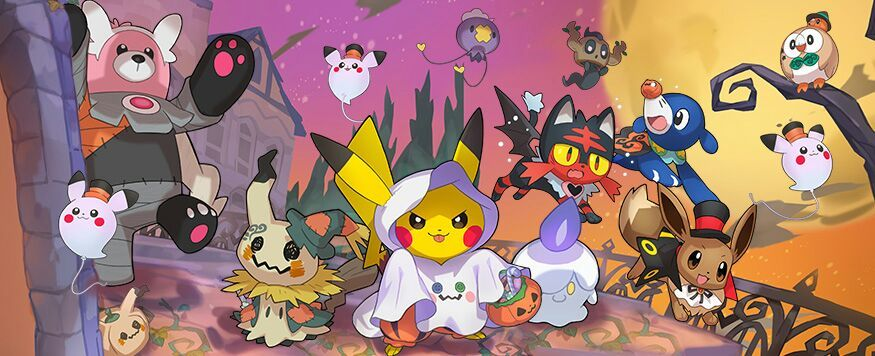

```Libraries```

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras_preprocessing import image
import numpy as np
import tensorflow as tf

### ```Data Preparation```

In [2]:
path = Path("./dataset/")
dirs = path.glob("*")

In [3]:
image_data = []
labels = []
pokemon_dictionary = {
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Charmender" : 2
}

In [4]:
for folder_dir in dirs:
    
    label = str(folder_dir).split("\\")[-1] #Which folder are we in
    
    # Iterating over each image in directory label
    
    for image_path in folder_dir.glob("*.jpg"):
        
        
        img = image.load_img(image_path, target_size = (100, 100))
        img = image.img_to_array(img)
        image_data.append(img)
        labels.append(pokemon_dictionary[label])

C:\Users\joygu\anaconda3\envs\myenv\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


### ```Visualization```

In [5]:
import numpy as np

In [6]:
# Converting whole data into numpy array

X = np.array(image_data)
Y = np.array(labels)

In [7]:
print(X.shape)
print(Y.shape)

(304, 100, 100, 3)
(304,)


In [8]:
X.dtype

dtype('float32')

``` Converting Datatype into int```

In [9]:
X = X.astype("uint8")

```Shuffling Data```

In [10]:
data = list(zip(X, Y))

np.random.shuffle(data)

In [11]:
X[:], Y[:] = zip(*data)

``` Plot some pokemons```

In [12]:
def Pokemon(X):
    for ix in range(10):
        plt.imshow(X[ix])
        plt.axis("off")
        plt.show()

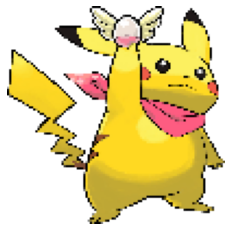

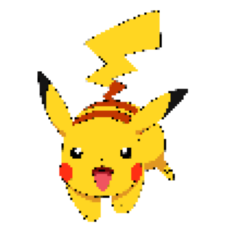

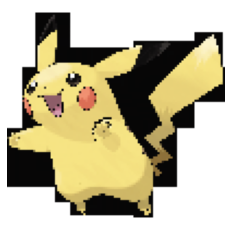

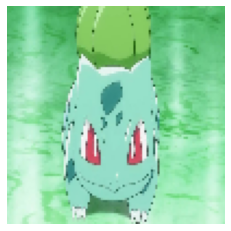

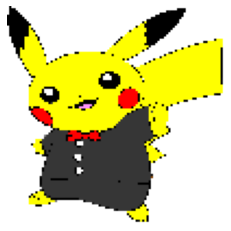

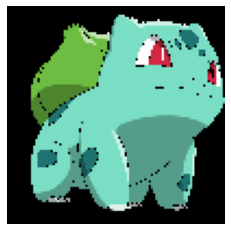

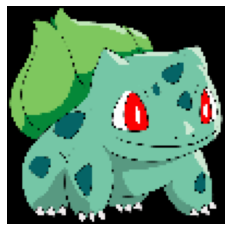

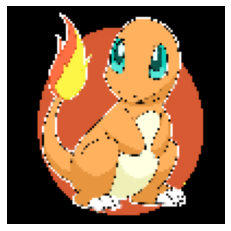

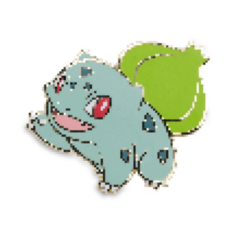

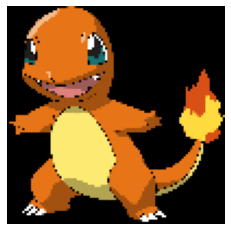

In [13]:
Pokemon(X)

## ```Neural Network```

In [14]:
def softmax(a):
    # Here a is a vector
    numerator   = np.exp(a) # Broadcasting whole vector
    denominator = np.sum(numerator, axis = 1, keepdims = True)
    
    return numerator/denominator

In [15]:
class NeuralNetwork:
    
    def __init__(self, number_of_features, layers, output_size):
        
        np.random.seed(0)
        model = {}
        
        """Randomly Assigning Weights for different layers"""
        
        #----------------------------------------Layer 1---------------------------------------
        model["W1"] = np.random.randn(number_of_features, layers[0]) # n X no_of_neurons_in_layer_1
        model["b1"] = np.zeros((1, layers[0])) # 1 X no_of_neurons_in_layer_1
        
        #----------------------------------------Layer 2---------------------------------------
        model["W2"] = np.random.randn(layers[0], layers[1]) # n X no_of_neurons_in_layer_2
        model["b2"] = np.random.randn(1, layers[1]) # 1 X no_of_neurons_in_layer_2
        
        #----------------------------------------Layer 3----------------------------------------
        model["W3"] = np.random.randn(layers[1], layers[2])
        model["b3"] = np.random.randn(1, layers[2])
        
        #----------------------------------------Layer 4---------------------------------------
        model["W4"] = np.random.randn(layers[2], layers[3])
        model["b4"] = np.random.randn(1, layers[3])
        
        #----------------------------------------Layer 5---------------------------------------
        model["W5"] = np.random.randn(layers[3], output_size) # n X no_of_neurons_in_layer_3
        model["b5"] = np.random.randn(1, output_size) # 1 X no_of_neurons_in_layer_2
        
        
        self.model = model
        self.activation_outputs = None
        
   

    def Forward(self, x):
        
        # Unpacking
        W1, W2, W3, W4, W5 = self.model["W1"], self.model["W2"], self.model["W3"], self.model["W4"], self.model["W5"]
        b1, b2, b3, b4, b5 = self.model["b1"], self.model["b2"], self.model["b3"], self.model["b4"], self.model["b5"]
        
        
        # For Layer 1
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1) # We are using tanh as an activation function
        
        # For Layer 2
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        # For Layer 3
        z3 = np.dot(a2, W3) + b3
        a3 = np.tanh(z3)
        
        # For Layer 4
        z4 = np.dot(a3, W4) + b4
        a4 = np.tanh(z4)
        
        # For layer 5
        z5 = np.dot(a4, W5) + b5
        y_predict = softmax(z5)
        
        
        # Store each activation value
        self.activation_history = (a1, a2, a3, a4, y_predict)
        
        return y_predict
        
    
    def Backward(self, x, y, Lr = 0.001, ):
        
        # Unpacking
        W1, W2, W3, W4, W5 = self.model["W1"], self.model["W2"], self.model["W3"], self.model["W4"], self.model["W5"]
        b1, b2, b3, b4, b5 = self.model["b1"], self.model["b2"], self.model["b3"], self.model["b4"], self.model["b5"]
        m = x.shape[0]
        a1, a2, a3, a4, y_predict = self.activation_history
        
        # Delta for output layer 
        delta5 = y_predict - y
        
        # Gradient for output layer
        dw5 = np.dot(a4.T, delta5)
        db5 = np.sum(delta5, axis = 0)
        
        
        # Delta for fourth layer
        delta4 = (1 - np.square(a4)) * np.dot(delta5, W5.T)
        
        # Gradient for fourth layer
        dw4 = np.dot(a3.T, delta4)
        db4 = np.sum(delta4, axis = 0)
        
        # Delta for third layer
        delta3 = (1 - np.square(a3)) * np.dot(delta4, W4.T)
        
        # Gradient for third layer
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis = 0)
        
        # Delta for second layer
        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        
        # Gradient for second layer
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)
        
        # Delta for first layer
        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)
        
        # Gradient for first layer
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis = 0)
        
        
        ## Update MODEL PARAMETERS --->
        self.model["W1"] -= Lr * dw1
        self.model["b1"] -= Lr * db1
        
        self.model["W2"] -= Lr * dw2
        self.model["b2"] -= Lr * db2
        
        self.model["W3"] -= Lr * dw3
        self.model["b3"] -= Lr * db3
        
        self.model["W4"] -= Lr * dw4
        self.model["b4"] -= Lr * db4
        
        self.model["W5"] -= Lr * dw5
        self.model["b5"] -= Lr * db5    
        
    
    def Predict(self, x):
        
        y_out = self.Forward(x)# Forward feed to the network
        
        return np.argmax(y_out, axis = 1) # Returning the index with maximum probability
    
    def Summary(self):
        
        # Unpacking every parameter
        W1, W2, W3, W4, W5 = self.model["W1"], self.model["W2"], self.model["W3"], self.model["W4"], self.model["W5"]
        a1, a2, a3, a4, y = self.activation_history
        
        print("W1 :", W1.shape)
        print("a1 :", a1.shape)
        
        print("W2 :", W2.shape)
        print("a2 :", a2.shape)
        
        print("W3 :", W3.shape)
        print("y:"  , y.shape)

In [16]:
def one_hot(y, depth):
    
    m = y.shape[0]
    
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    
    return y_oht

In [17]:
def Loss(y_oht, prob):
    loss = -np.mean(y_oht * np.log(prob))
    return loss

In [18]:
def Train(X, Y, model, epochs, Lr, logs = True):
    
    training_loss = []
    classes = len(np.unique((Y)))
    
    Y_oht = one_hot(Y, classes)
    
    for ix in range(epochs):
        
        y = model.Forward(X)
        l = Loss(Y_oht, y)
        training_loss.append(l)
        model.Backward(X, Y_oht, Lr)
        
        if logs:
            #print("Epoch {} Loss {}".format(ix, l))
            pass
            
        
    return training_loss

In [19]:
X.shape

(304, 100, 100, 3)

In [20]:
X = X.reshape((304, 30000))

In [21]:
myneural = NeuralNetwork(number_of_features = 30000, layers = [150, 100, 100, 75], output_size = 3)  

In [22]:
Loss = Train(X, Y, myneural, epochs=1500, Lr = 0.00002)

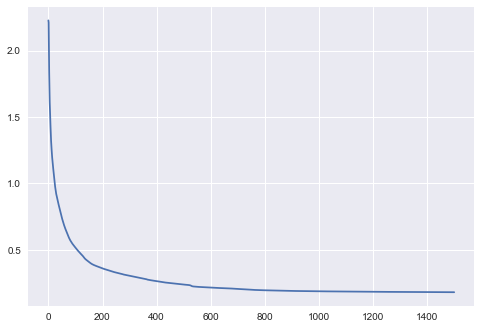

In [23]:
plt.style.use("seaborn")
plt.plot(Loss)
plt.show()

In [24]:
def accuracy_check(model, x, y):
    y_predict = model.Predict(x)
    count = np.sum(y_predict == y)
    return count, y_predict

In [25]:
count, y_predict = accuracy_check(myneural, X, Y)

## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

In [27]:
cnf = confusion_matrix(y_predict, Y)

In [28]:
print(cnf)

[[76 18 11]
 [12 58 15]
 [13 25 76]]


Confusion matrix, without normalization
[[76 18 11]
 [12 58 15]
 [13 25 76]]


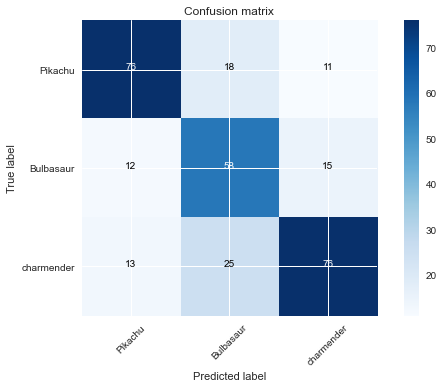

In [29]:
plot_confusion_matrix(cnf, classes = ["Pikachu", "Bulbasaur", "charmender"])